In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 単パラメータの最適化

ここで用いる関数．最小値を求めたい

In [2]:
def f(x):
    return x**4 - 3 * x**3 + 2 * x**2 + x

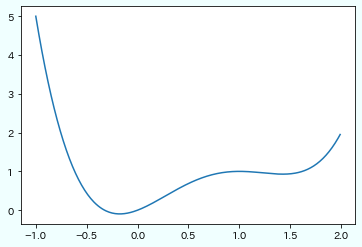

In [3]:
plt.figure(facecolor='azure')
x = np.arange(-1, 2, 0.01)
plt.plot(x, f(x))

## 線形探索
1. 関数を等間隔に細かく区切る
2. 等間隔に区切った値をそれぞれ求める
3. とった値を比較し，最小値を求める

In [4]:
# 等間隔に区切る
def grid_value(L, R, num):
    return list(map(lambda x: [f(x), x],
                    np.linspace(L, R, num=num+1, endpoint=True)))

# 区切った中でf(x)が最小となるxを返す
def min_linear_search(L, R, num):
    return min(grid_value(L, R, num), key=lambda x: x[0])[1]

# 求解
x = min_linear_search(-1, 2, 40)
print(f'x: {x: .3f}, value: {f(x): .3f}')

x: -0.175, value: -0.097


## 最急降下法
1. 開始位置を選び，その点の傾きを求める
2. （坂を下る方向に）ステップ幅$\times$傾き分移動する  
  傾きが大きいところでは一気に進んで，小さいところでは少しずつ進む．極値に近づくと傾きが緩やかになっていくので合理的な進み方

x: -0.175, value: -0.097
x:  1.426, value:  0.929
x:  11999999988475.332, value:  20735999920336311102019958993147202285927065255411712.000


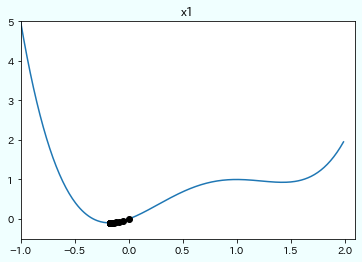

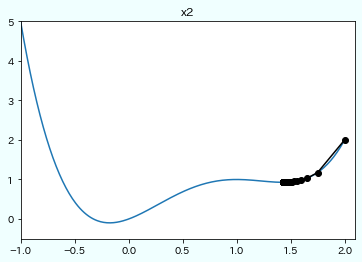

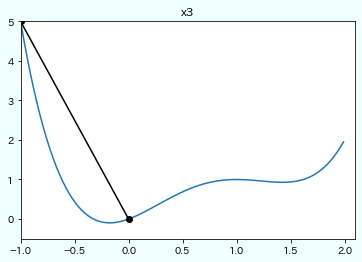

In [7]:
# 右側微分の定義
def differencial(x, EPS=1e-12):
    return (f(x+EPS) - f(x)) / EPS

# 最急降下法
def gradient_descent(alpha, start, steps):
    pos = start
    pos_list = []
    for _ in range(steps):
        pos_list.append(pos)
        # 現在の地点の勾配（傾き）
        grad = differencial(pos)
        # （坂を下る方向に）ステップ幅*傾き分移動する
        pos = pos - alpha * grad
    return pos, pos_list

def drow_path(title, pos_list):
    plt.figure(facecolor='azure')
    plt.xlim([-1, 2.1])
    plt.ylim([-0.5, 5])
    plt.title(f'{title}')
    x = np.arange(-1, 2, 0.01)
    plt.plot(x, f(x))
    plt.plot(pos_list, [f(x) for x in pos_list], color='k', marker='o')

# 求解
x1, pos_list = gradient_descent(0.05, 0, 100)
drow_path('x1', pos_list)

x2, pos_list = gradient_descent(0.05, 2, 100)
drow_path('x2', pos_list)

x3, pos_list = gradient_descent(1, 0, 100)
drow_path('x3', pos_list)

for x in [x1, x2, x3]:
    print(f'x: {x: .3f}, value: {f(x): .3f}')

開始位置が最小値の谷と異なっていたり（x2），ステップ幅が大きすぎると（x3）最適解が得られない．
* x2のように局所最適解に嵌っているケースは乱択アルゴリズムや焼きなまし法を用いて対処する
* x3のようなケースでは，発散させないことと計算結果を早く出すことを両立するために，ステップが進むにつれてステップ幅を小さくする等の対処をする

## 乱択アルゴリズム
1. ランダムに複数の点を取る
2. 最急降下法を用いて極小値を探す
3. 極小値の中から最小のものを探す

In [25]:
def randomized_algorithm(alpha, L, R, points_num, steps):
    values = []
    # ランダムに点をとり，それぞれに対して最急降下法を適用
    for x in np.random.uniform(L, R, points_num):
        values.append(gradient_descent(alpha, x, steps))
    return min(values)

x = randomized_algorithm(0.05, -1, 2, 10, 100)[0]
print(f'x: {x: .3f}, value: {f(x): .3f}')

x: -0.175, value: -0.097


In [24]:
def randomized_algorithm(alpha, L, R, points_num, steps):
    value = map(lambda x: gradient_descent(alpha, x, steps),
                np.random.uniform(L, R, points_num))
    return min(value)[0]

randomized_algorithm(0.05, -1, 2, 10, 100)

-0.17539189768887342

# 複数のパラメータの最適化

# さらに高度な最適化手法